### Calculation

In [100]:
weight=[51,62,69,64,65,56,58,57,55]
height=[162,182,176,173,172,174,169,173,170]
Class=['U','N','N','N','N','U','N','N','N']
data=pd.DataFrame(list(zip(weight,height,Class)),columns=('Weight','Height','Class'))
data

,Weight,Height,Class
0,51,162,U
1,62,182,N
2,69,176,N
3,64,173,N
4,65,172,N
5,56,174,U
6,58,169,N
7,57,173,N
8,55,170,N


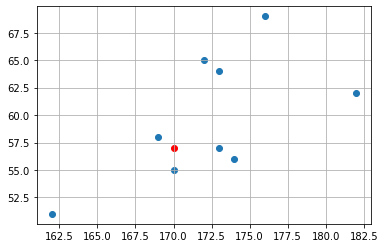

In [101]:
import matplotlib.pyplot as plt
plt.scatter(data['Height'],data['Weight'])
plt.scatter(170,57,c='r')
plt.grid()

In [102]:
import math

b=(170-167)**2+(57-51)**2
b1=(170-176)**2+(57-69)**2
#a=math.sqrt(b)"""
print(math.sqrt(b))
print(math.sqrt(b1))

6.708203932499369
13.416407864998739


1.Get The data

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('UniversalBank.csv')
df.head(5)

,ID,Gender,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,F,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,F,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,M,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,M,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,M,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.drop('ID',axis=1,inplace=True)

In [5]:
df.drop('ZIP Code',axis=1,inplace=True)

In [6]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [8]:
df.isna().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


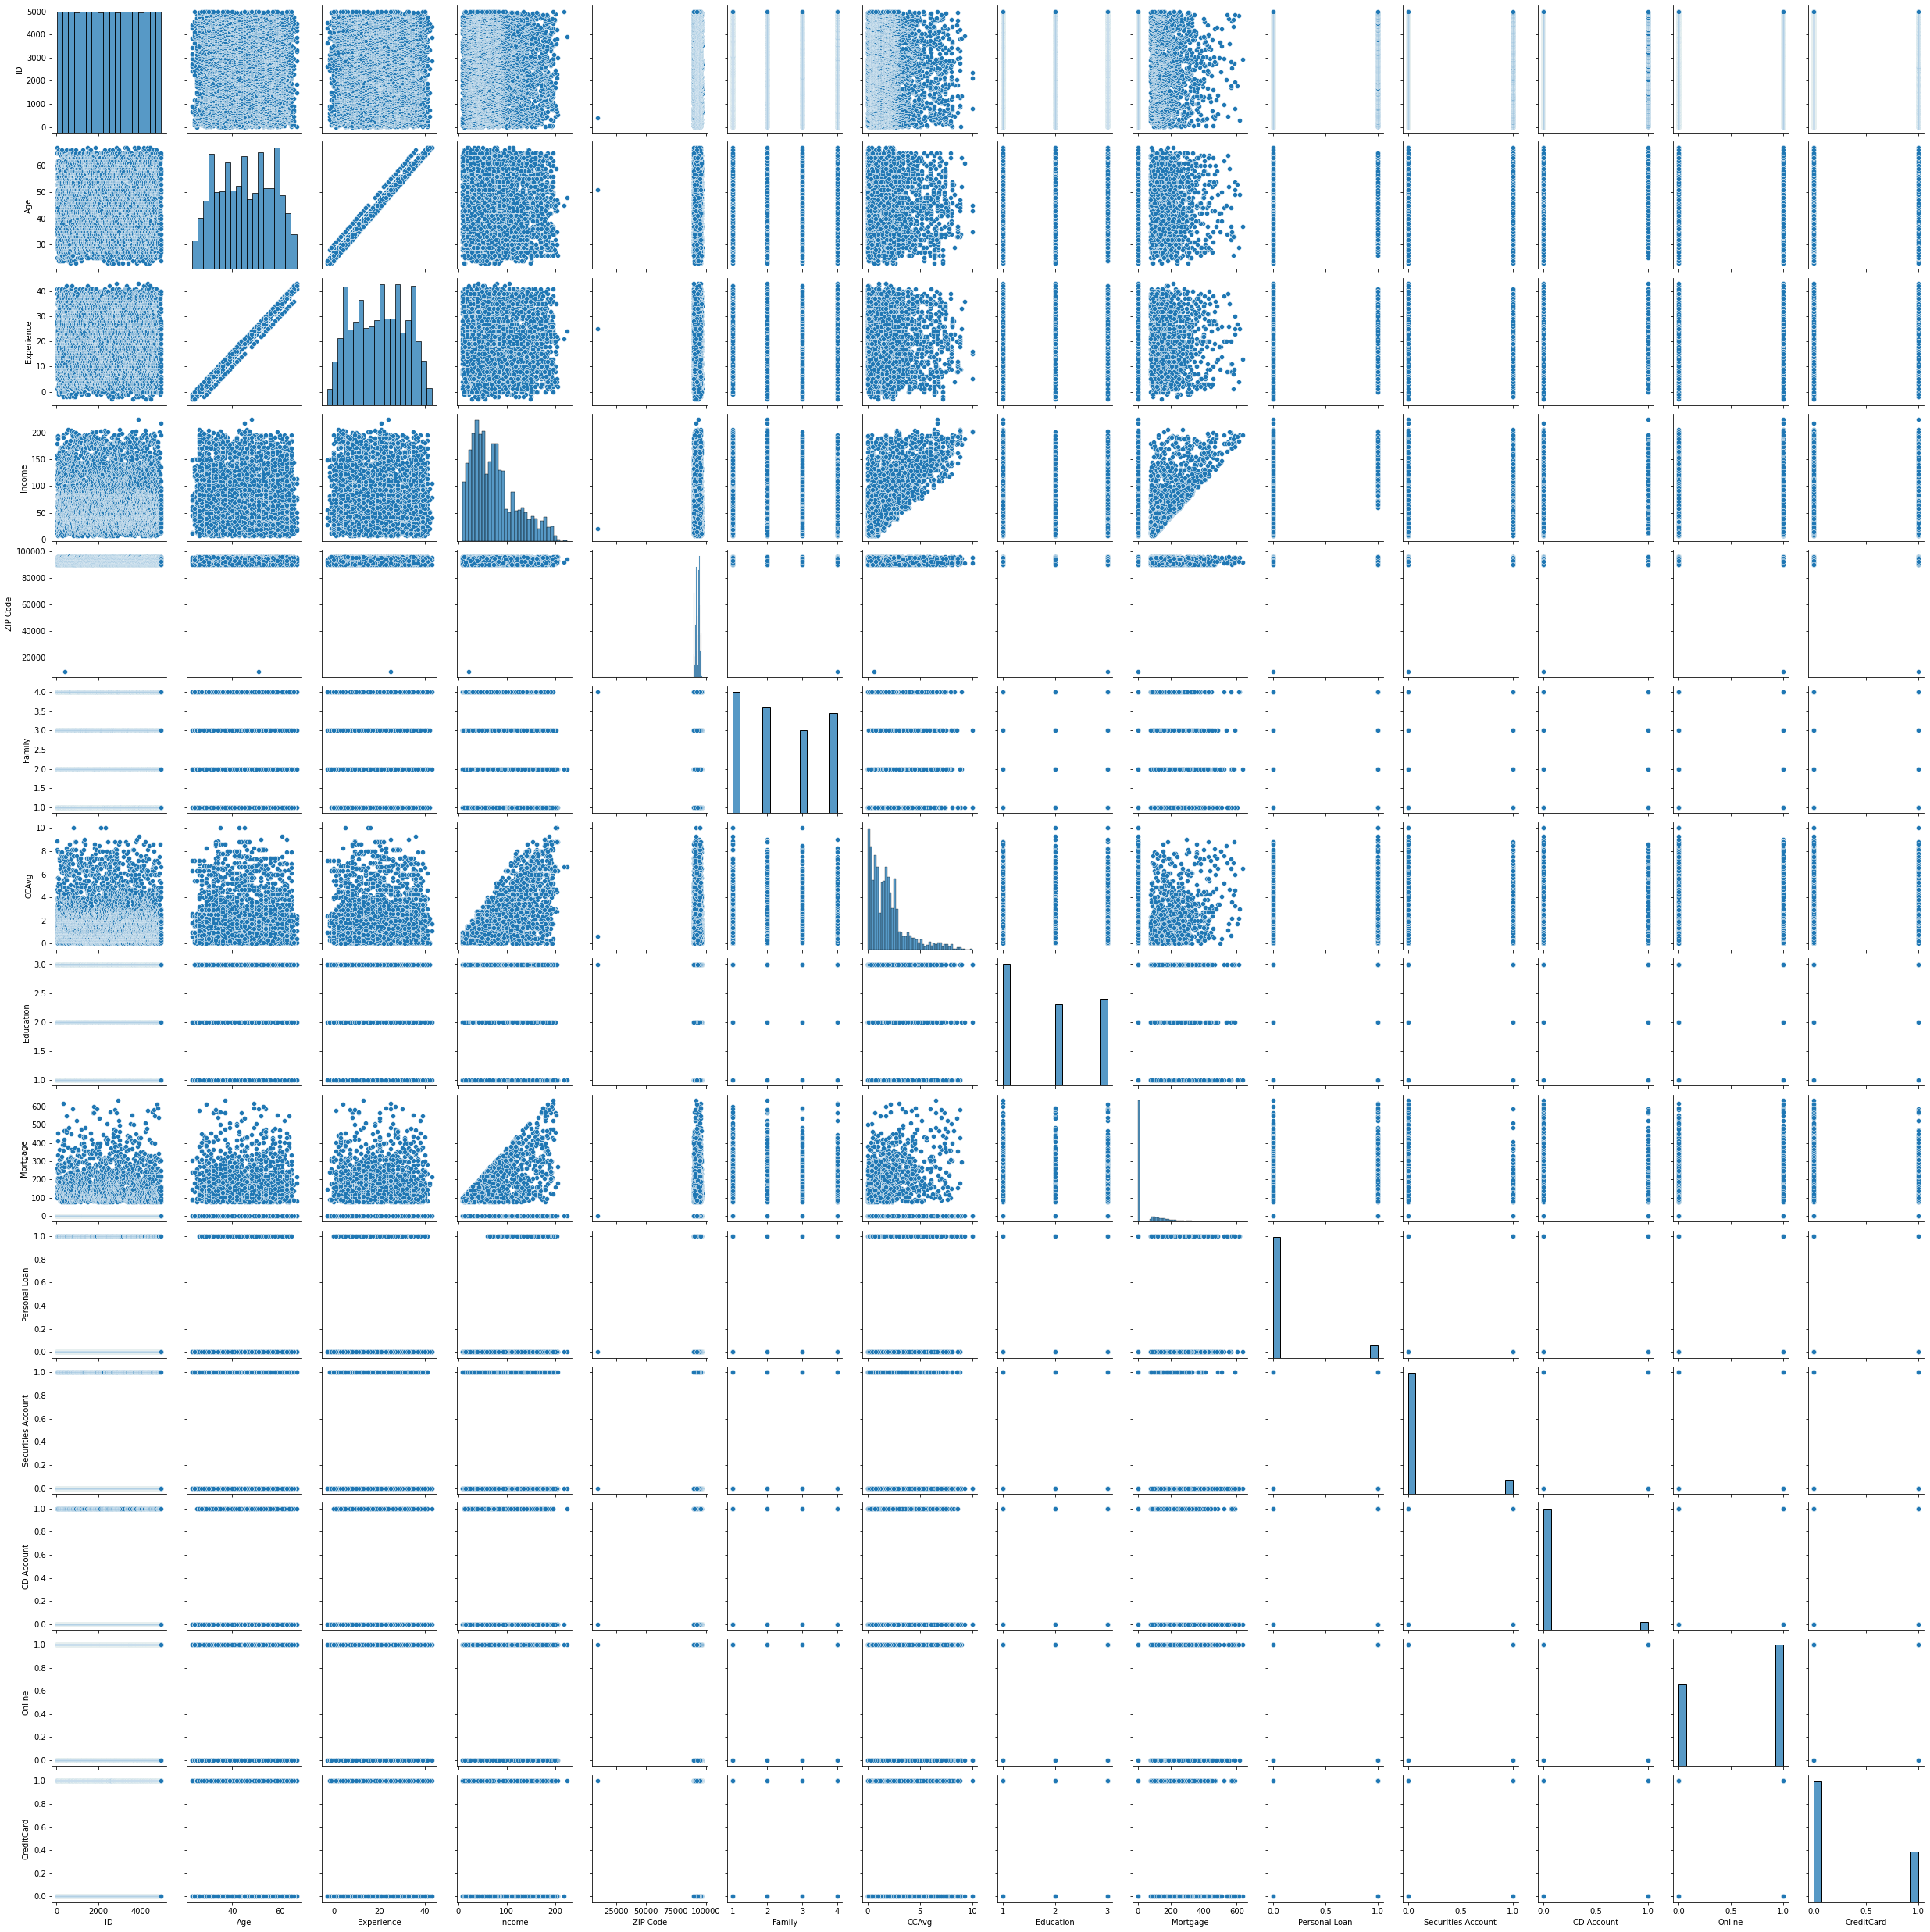

In [98]:
import seaborn as sns
sns.pairplot(df)

In [11]:
X=df[['Experience','Income']]
y=df['CreditCard']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [15]:
X_train.shape

(3500, 2)

In [16]:
x_test.shape

(1500, 2)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model=KNeighborsClassifier(n_neighbors=3)

In [21]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [22]:
pred=model.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Check the Accuracy Score

In [24]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,pred)*100

60.73333333333333

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test,pred)

array([[824, 244],
       [345,  87]], dtype=int64)

In [32]:
df.sample(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2735,36,12,70,3,2.6,2,165,0,0,0,1,0
2169,52,27,30,2,0.7,2,0,0,0,0,1,1
3764,63,37,15,2,0.4,1,0,0,0,0,0,0
3735,40,14,78,1,5.2,1,0,0,0,0,1,0
4574,35,11,193,2,6.5,1,0,0,0,0,0,1


In [33]:
model.predict([[27 , 30]])

array([1], dtype=int64)

In [34]:
model.predict([[14,78]])

array([0], dtype=int64)

In [36]:
model.predict([[11,193]])

array([0], dtype=int64)

### to find best k values

In [40]:
K_values = [3,5,7,9,21,25,51]
scores = {}

In [41]:
for k in K_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    scores[k] = model.score(X_train,y_train)

In [42]:
scores.keys()

dict_keys([3, 5, 7, 9, 21, 25, 51])

In [43]:
scores.values()

dict_values([0.794, 0.752, 0.7257142857142858, 0.7188571428571429, 0.7037142857142857, 0.7045714285714286, 0.7034285714285714])

In [44]:
scores

{3: 0.794,
 5: 0.752,
 7: 0.7257142857142858,
 9: 0.7188571428571429,
 21: 0.7037142857142857,
 25: 0.7045714285714286,
 51: 0.7034285714285714}

In [45]:
import matplotlib.pyplot as plt

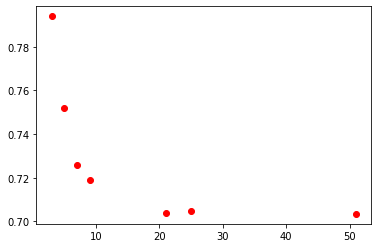

In [46]:
plt.figure()

plt.scatter(scores.keys(),scores.values(),c='red')

plt.show()

In [61]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [56]:
pred=model.predict(X_test)

In [57]:
pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [58]:
accuracy_score(y_test,pred)

0.668

In [59]:
confusion_matrix(y_test,pred)

array([[739, 156],
       [259,  96]], dtype=int64)

In [70]:
X=df[['CD Account']]
y=df['CreditCard']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
model=KNeighborsClassifier(n_neighbors=3)

In [74]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [75]:
pred=model.predict(X_test)

In [76]:
accuracy_score(y_test,pred)

0.7392

In [77]:
confusion_matrix(y_test,pred)

array([[857,  18],
       [308,  67]], dtype=int64)

#### KN Regressor

In [78]:
data=pd.read_csv('palcement.csv')
data.head()

,year,ECE,CSE,EEE,placement data
0,1980,10.0,10.0,20,40.0
1,1981,50.0,50.0,25,125.0
2,1982,20.0,30.0,40,90.0
3,1983,152.0,50.0,45,247.0
4,1984,25.0,40.0,55,120.0


In [79]:
input_data=data[['year']]
output_data=data['placement data']

In [80]:
X_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.25)

In [81]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
model=KNeighborsRegressor()

In [83]:
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [84]:
pred=model.predict(x_test)

In [85]:
model.score(X_train,y_train)*100

55.586560284638665

In [86]:
model.score(x_test,y_test)

0.7571900471389608

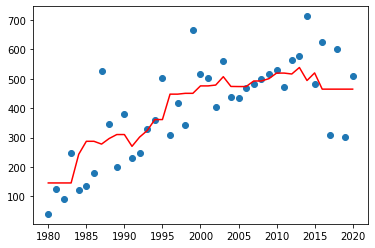

In [92]:
plt.scatter(data['year'],data['placement data'])
plt.plot(data['year'],model.predict(data[['year']]),c='r')